# Tutorial 3_Extension

By doing this extension, I want to achieve three things:

1) create my own regression class (similar to that of scikit learn). A special feature about this class is that it should have a 'polynomial feautres' feature

2) I want to further explore the 'meshgrid' concept in the context of the example used in the tutorial, since this was rather confusing

3) explore the functionality of plotly and mplot3d

# Libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Standard Linear Regression

In [6]:
# online copy
df = pd.read_csv('http://pogo.software/me4ml/xray.csv')
df.head()

,Distance (mm),Total absorption
0,3.342876,175.719675
1,1.203074,57.261716
2,3.976552,179.448952
3,3.335264,176.218606
4,3.400901,167.033748


In [55]:
x = df['Distance (mm)']
y = df['Total absorption']

# Background material:

X-ray power decreases linearly as a function of distance, so:
$$P \propto -\lambda d$$

Where $\lambda>0$

This results in an exponential decay as the X-ray propagates through space.
In practice, when an X-ray passes through objects, there is a phenomenon called 'beam hardening', which reduces the attenuation value, so the relationship is no longer linear.

In this tutorial, we are interested in finding a simple polynomial relationship [1]

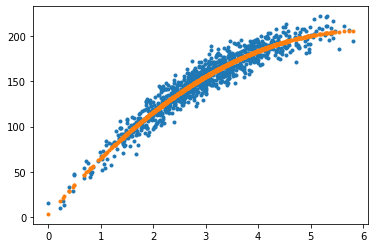

In [88]:
class LinearRegression():
    """
    A class for linear regression
    
    Attributes:
    -----------
    
    Methods:
    --------
    """
    
    def __init__(self, X, y):
        try:
            self.X_cols = X.columns
            self.X = np.asarray(X)
        except:
            self.X_cols = X.name
            self.X = np.asarray(X).reshape([-1,1])
                
        self.y_col = y.name
        self.y = y
        
        self.n_points = self.X.shape[0]
        self.n_attr = self.X.shape[1]
        
        self.X = np.append(np.ones([self.n_points, 1]), self.X, axis = 1)

        self.beta = None
        self.yhat = None
        
    def fit(self):
        A = np.zeros([self.n_attr + 1, self.n_attr + 1])
        b = np.zeros([self.n_attr + 1, 1])
        for i in range(self.n_attr+1):
            b[i] = np.dot(self.y, self.X[:,i])
            for j in range(self.n_attr+1):
                A[i,j] = np.dot(self.X[:,i], self.X[:,j]) 
        
        self.beta = np.linalg.solve(A,b)
    
    def predict(self, X = None):
        X = np.append(np.ones([self.n_points, 1]), X, axis = 1) if X else self.X
        y = np.zeros(self.n_points)
        
        for i, beta in enumerate(self.beta):
            y = y + beta*X[:,i]
        
        self.yhat = y
        return y
    
    def plot(self, axis = 0):
        fig, ax = plt.subplots()
        plt.plot(self.X[:, axis +1], self.y,'.')
        plt.plot(self.X[:,axis + 1],self.yhat,'.')
    
df['dist_2'] = x**2
X = df[['Distance (mm)','dist_2']]
m = LinearRegression(X,y)
m.fit()
yhat = m.predict()
m.plot()

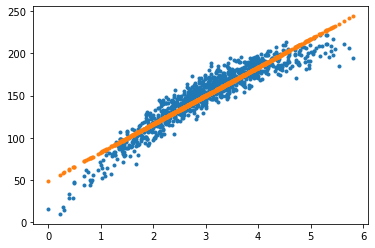

In [90]:
m = LinearRegression(x,y)
m.fit()
yhat = m.predict()
m.plot()

In [26]:

        

def LinearRegression(X, y):
    """
    A function that performs a multivariate linear regression with predictors X and
    target y
    
    NOTE: X must be a dataframe as input, NOT series
    """
    
    n_attr = X.shape[1] if len(X.shape) > 1 else 1
    n_points = X.shape[0]
    X = np.append(np.ones([n_points,1]), X, axis=1)
    print(X)

LinearRegression(X,y)

NameError: name 'X' is not defined

In [193]:
class Regression():
    """ Class for regression """
    def __init__(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        beta = None
    

    def LinReg2D(self):
        n_points = self.X.shape[0]
        A = np.array([
            [self.X.sum(), (self.X**2).sum()],
            [n_points, self.X.sum()],
        ])
        b = np.array([
            [np.dot(self.X,self.y)],
            [self.y.sum()]
        ])
        print(A,b)
        self.beta = np.linalg.solve(A,b)
        return self.beta
    
    def LinearRegression(self):
        n_points = self.X.shape[0]
        
        n_attr = self.X.shape[1]
        A = np.zeros([n_attr + 1, n_attr +1])
        b = np.zeros([n_attr+1,1])
        for i in range(n_attr+1):
            b[i] = np.dot(self.y, (self.X[:,0])**(n_attr-i))
            for j in range(n_attr+1):
                A[i,j] = np.sum((self.X[:,0])**(n_attr - i + j))
        print(A,b)
        self.beta = np.linalg.solve(A,b)
        print(self.beta)
        return self.beta
        
    def plot(self,**kwargs):
        plt.plot(self.X[:,0], self.y,'.')
        x = np.linspace(0,6,200)
        y = np.zeros(200)
        for i, coeff in enumerate(self.beta):
            print(i, coeff)
            y = np.add(y, coeff*x**i)
            
        plt.plot(x,y,**kwargs)
    

model = Regression(x,y)
model.LinReg2D()
model.plot(color='black')
model.beta

[[3000.8863473  9979.55332572]
 [1000.         3000.8863473 ]] [[482776.42824979]
 [149967.06847032]]


IndexError: too many indices for array

In [194]:
# this is only for the sake of testing
b = np.zeros([3,1])
model = Regression(x,y)
model.LinearRegression()
model.plot(color = 'black')
model.beta


IndexError: tuple index out of range

In [195]:
# define new "polynomial dataframe"
df['Dist_squared'] = x**2
df.head()

,Distance (mm),Total absorption,Dist_squared
0,3.342876,175.719675,11.174821
1,1.203074,57.261716,1.447386
2,3.976552,179.448952,15.812962
3,3.335264,176.218606,11.123983
4,3.400901,167.033748,11.566126


[[  9979.55332572  35827.1979127  136929.351774  ]
 [  3000.8863473    9979.55332572  35827.1979127 ]
 [  1000.           3000.8863473    9979.55332572]] [[1683776.78670197]
 [ 482776.42824979]
 [ 149967.06847032]]
[[ 3.32219469]
 [67.59434588]
 [-5.63132177]]
0 [3.32219469]
1 [67.59434588]
2 [-5.63132177]


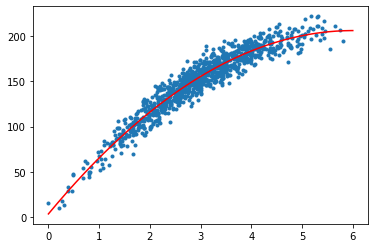

In [196]:
X = df[['Distance (mm)','Dist_squared']]

model = Regression(X, y)
model.LinearRegression()
model.plot(color = 'red')

# References

Note: citations do not follow any well-established format.

[1] ME4 Machine Learning, Peter Huthwaite, Imperial College London